In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# v1 : تحتوي على التصنيف (ham أو spam)
# v2 : تحتوي على محتوى الرسالة النصية
# الحروف من v3 فما فوق : أعمدة فارغة (NaN)، لا تحمل أي بيانات مفيدة.

# تنظيف البيانات (Data Cleaning)
# حذف الأعمدة الفارغة (Unnamed: 2, 3, 4)
# إعادة تسمية الأعمدة لتصبح أكثر وضوحًا (مثل label و text)
# 2. تحليل أساسي للبيانات (Basic Analysis)
# عدد السطور (عدد الرسائل)
# عدد كل نوع من التصنيفات (ham vs spam)
# طول الرسائل (متوسط عدد الكلمات/الأحرف لكل نوع)
# وجود تكرارات في الرسائل
# 3. تحليل النصوص (Text Analysis)
# استخدام الـ WordCloud لعرض الكلمات الشائعة في كل نوع
# تحليل الترددات (Top frequent words)
# استخدام CountVectorizer أو TfidfVectorizer

In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
# حذف الأعمدة غير الضرورية
#df.drop(df.iloc[:, 2:], axis=1, inplace=True)
df.drop(df.columns[2:], axis=1, inplace=True)
df.columns = ['label', 'text']

In [7]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.isnull().sum()

,0
label,0
text,0


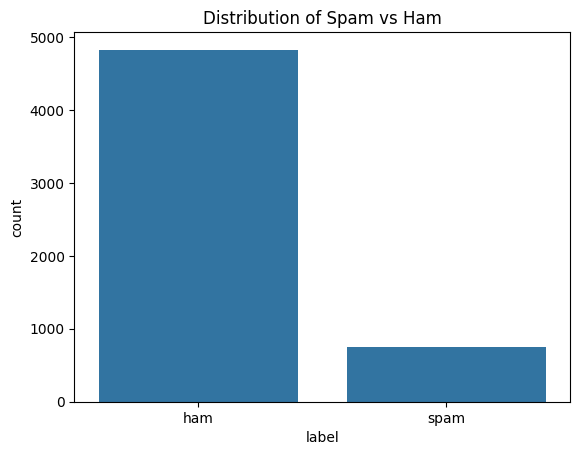

In [10]:
sns.countplot(data=df, x='label')
plt.title('Distribution of Spam vs Ham')
plt.show()

In [11]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [12]:
#Percentage of labels
df['label'].value_counts(normalize=True)

,proportion
label,
ham,0.865937
spam,0.134063


In [13]:
# إضافة ميزات جديدة (Feature Engineering)
# مثل طول الرسالة:
df['text_length'] = df['text'].apply(len)

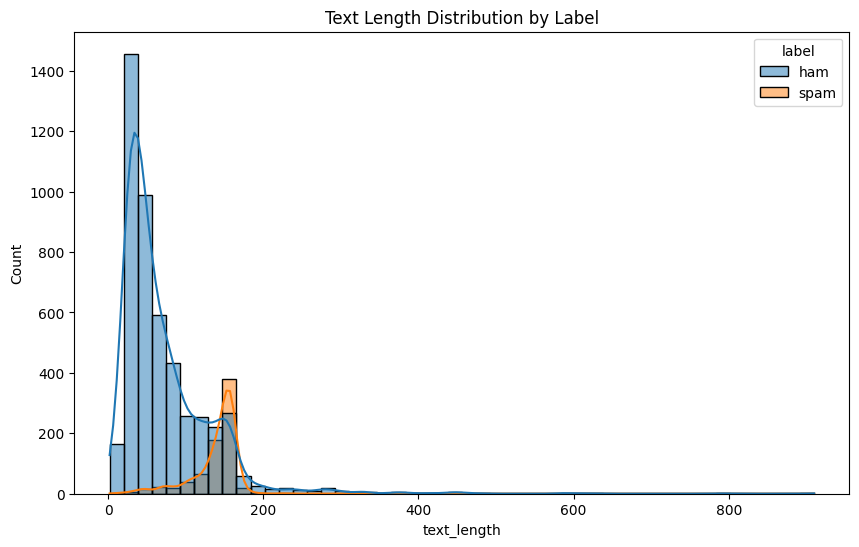

In [14]:
#نرسم توزيع الطول بناءً على التصنيف:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title('Text Length Distribution by Label')
plt.show()

In [15]:
df.groupby('label')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,71.023627,58.016023,2.0,33.0,52.0,92.0,910.0
spam,747.0,138.866131,29.183082,13.0,132.5,149.0,157.0,224.0


In [16]:
#ربما نحتاج إلى تنظيف النصوص من رموز، تقليل الحروف إلى صغيرة، إزالة كلمات توقف (stopwords) لاحقًا، لكن في الـ EDA نبدأ فقط بإضافة عدد الكلمات:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [17]:
# نعرض المتوسط:
df.groupby('label')['word_count'].mean()

,word_count
label,
ham,14.200622
spam,23.851406


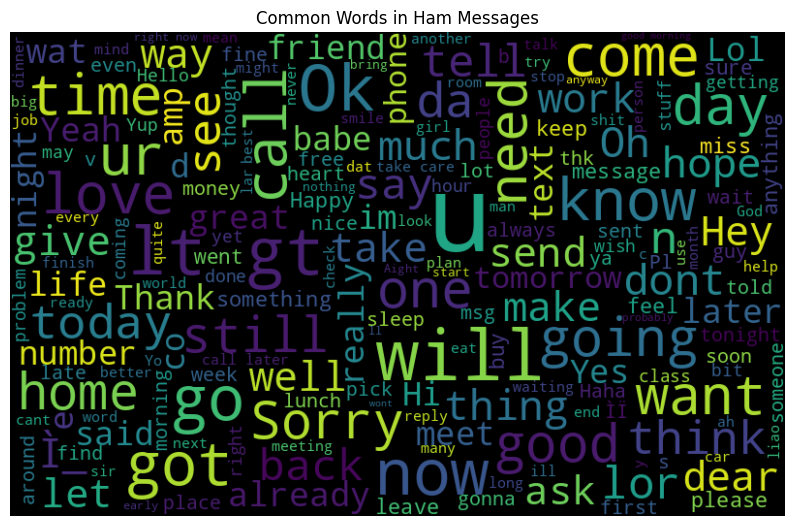

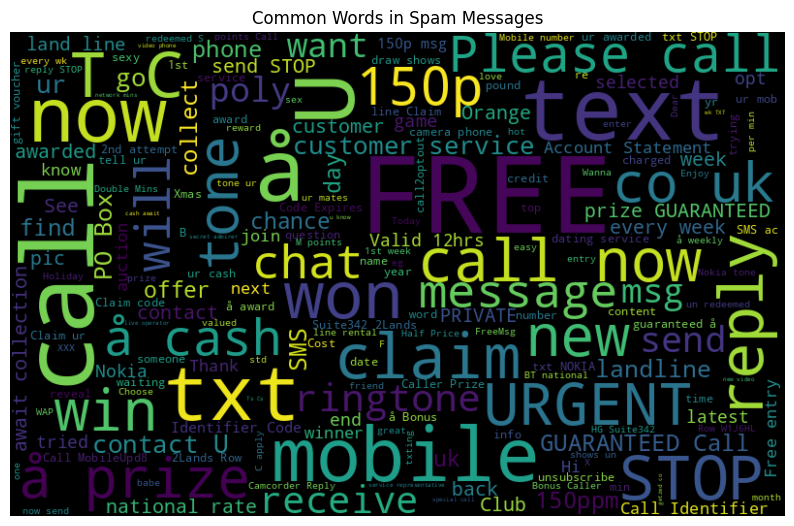

In [18]:
from wordcloud import WordCloud

# الكلمات في الرسائل العادية
ham_text = df[df['label'] == 'ham']['text'].str.cat(sep=' ')
spam_text = df[df['label'] == 'spam']['text'].str.cat(sep=' ')

# Cloud للـ ham
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(ham_text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Ham Messages")
plt.show()

# Cloud للـ spam
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(spam_text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Spam Messages")
plt.show()

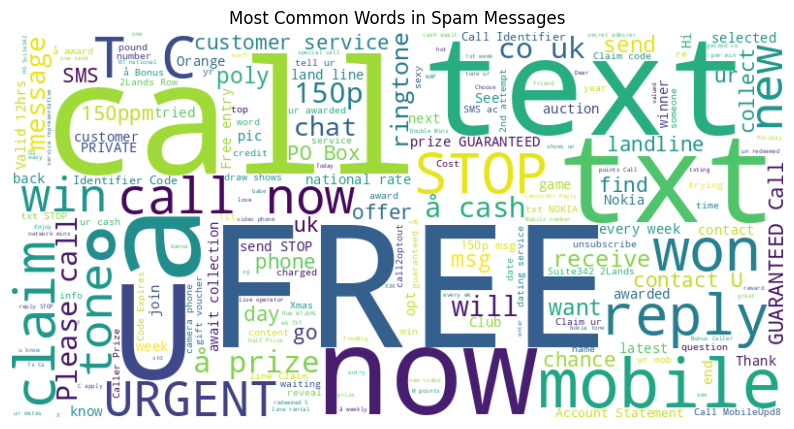

In [19]:
# تحليل النصوص (Text Analysis)
#  استخراج الكلمات الأكثر شيوعًا:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

# الحصول على كلمات spam
spam_words = ' '.join(df[df['label']=='spam']['text'])
ham_words = ' '.join(df[df['label']=='ham']['text'])

# يمكنك استخدام WordCloud لرسم سحابة الكلمات
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Spam Messages')
plt.show()

In [20]:
# نلاحظ أن البيانات غير متوازنة ، حيث يمثل الـ Spam حوالي 13.4% فقط من البيانات:

# 247 / 4825+747
# ​
#  =  747 / 5572
#
# ​
#  ≈0.134⇒13.4%
# 🔍 تحليل وتفسير النتائج:
# هذا يعني أن النموذج إذا "تعلم" فقط على ham وتجاهل spam، قد يعطي دقة عالية (Accuracy) لكنه لن يكون مفيدًا.
# لذلك نحتاج إلى استخدام مقاييس أخرى غير accuracy مثل:
# precision
# recall
# F1-score
# confusion matrix
# ROC-AUC (إذا قمنا بتحويل التصنيف إلى قيم احتمالية)
# ✅ خطوات إضافية لتحليل البيانات (EDA) بناءً على هذا الاستنتاج:

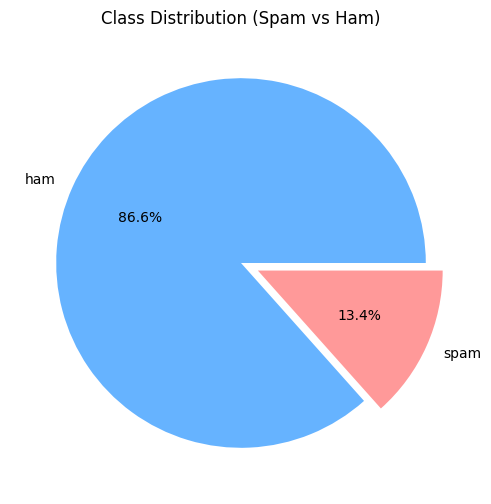

In [21]:
plt.figure(figsize=(6,6))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], explode=(0,0.1))
plt.title('Class Distribution (Spam vs Ham)')
plt.ylabel('')
plt.show()

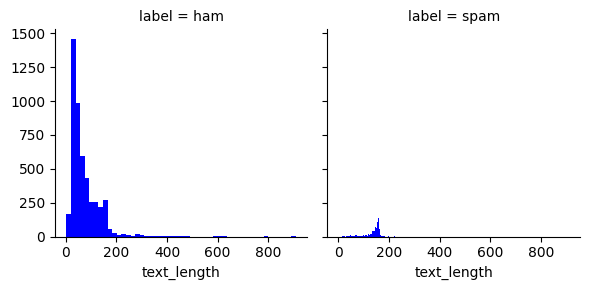

In [22]:
#  رسم بياني لتوزيع الطول:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(data=df, col='label')
g.map(plt.hist, 'text_length', bins=50, color='blue')
plt.show()

In [23]:
#  1. تنظيف النصوص (Text Preprocessing)
# نقوم بتنظيف النصوص من:

# الحروف الكبيرة → تحويل الكل إلى lowercase
# إزالة الرموز والعلامات الخاصة (punctuation)
# إزالة الأرقام (إذا كانت غير مهمة)
# إزالة كلمات التوقف (stopwords)
# Stemming أو Lemmatization

In [24]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# تحميل stop words
import nltk
nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()                                 # تحويل إلى حروف صغيرة
    text = re.sub(r'\d+', '', text)                     # إزالة الأرقام
    text = re.sub(r'[^\w\s]', '', text)                 # إزالة العلامات الخاصة
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # إزالة stop words
    tokens = [stemmer.stem(word) for word in tokens]    # Stemming
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
#  تحويل النصوص إلى متجهات (Vectorization)
# نستخدم أحد أسلوبين شائعين:
# CountVectorizer
# يحول النصوص إلى عدد مرات ظهور كل كلمة
# TfidfVectorizer
# يحسب وزن الكلمة بناءً على ترددها في النص وتوزيعها عبر جميع النصوص

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']

In [27]:
# تقسيم البيانات (Train/Test Split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
preds_nb = model_nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, preds_nb))
print(classification_report(y_test, preds_nb))

Naive Bayes Accuracy: 0.9713004484304932
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [29]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, preds_lr))
print(classification_report(y_test, preds_lr))

Logistic Regression Accuracy: 0.9479820627802691
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.96      0.64      0.77       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115



In [30]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear')  # Linear kernel works well with high-dimensional sparse data
model_svm.fit(X_train, y_train)
preds_svm = model_svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, preds_svm))
print(classification_report(y_test, preds_svm))

SVM Accuracy: 0.9775784753363229
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [31]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, preds_rf))
print(classification_report(y_test, preds_rf))

Random Forest Accuracy: 0.97847533632287
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Random Forest Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



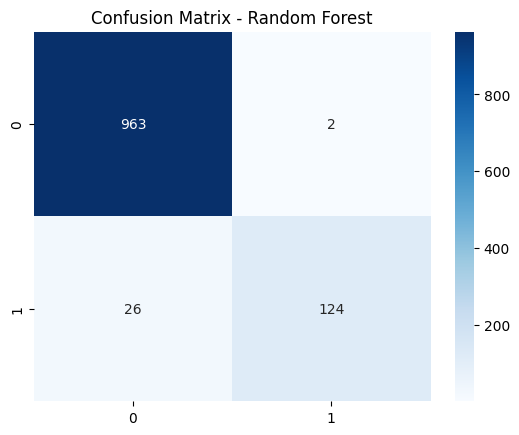

In [32]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

# إنشاء LabelEncoder
le = LabelEncoder()

# تحويل 'ham' -> 0 و 'spam' -> 1
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# scale_pos_weight = spam_count / ham_count → يُستخدم لمعالجة عدم توازن البيانات.
# LabelEncoder() يجب تطبيقه على y فقط (التصنيفات)، وليس على النصوص.

XGBoost Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.98      0.67      0.80       150

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.95      0.95      1115



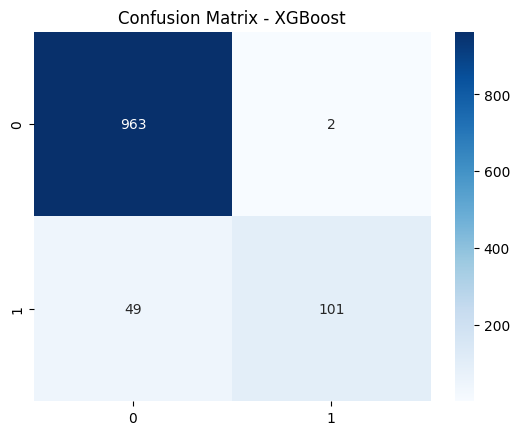

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=747/4825, eval_metric='logloss')
xgb.fit(X_train, y_train_encoded)  # استخدام y_train_encoded هنا

y_pred_encoded = xgb.predict(X_test)

# تحويل النتائج من أرقام إلى كلمات ham/spam
y_pred = le.inverse_transform(y_pred_encoded)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [52]:
print(f1_score(y_test, y_pred, pos_label='spam'))

0.7984189723320159


In [35]:
# SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_encoded)

print(f"Before SMOTE: {Counter(y_train_encoded)}")
print(f"After SMOTE: {Counter(y_resampled)}")

Before SMOTE: Counter({np.int64(0): 3860, np.int64(1): 597})
After SMOTE: Counter({np.int64(0): 3860, np.int64(1): 3860})


Naive Bayes with SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       965
           1       0.83      0.92      0.87       150

    accuracy                           0.96      1115
   macro avg       0.91      0.95      0.93      1115
weighted avg       0.97      0.96      0.96      1115



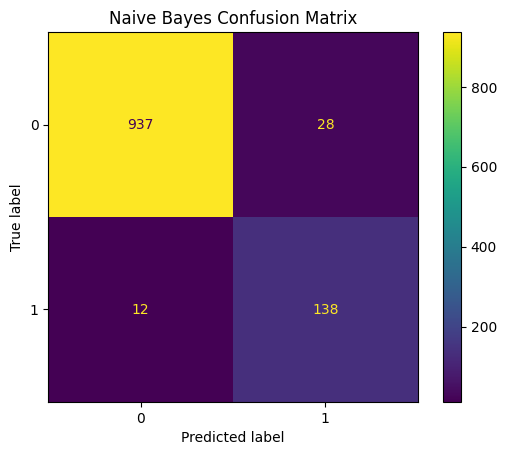

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
nb = MultinomialNB()
nb.fit(X_resampled, y_resampled)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes with SMOTE:")
print(classification_report(y_test_encoded, y_pred_nb))
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded, y_pred_nb)).plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()

Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.93      0.90      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



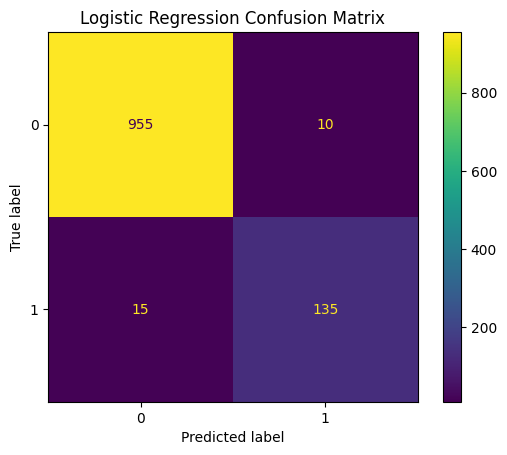

In [37]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_resampled, y_resampled)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression with SMOTE:")
print(classification_report(y_test_encoded, y_pred_lr))
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded, y_pred_lr)).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

SVM with SMOTE:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.98      0.82      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



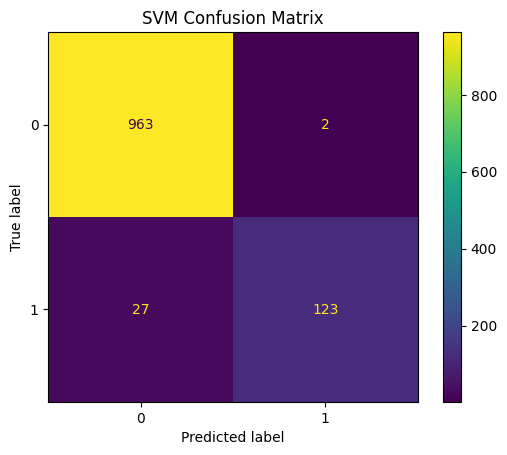

In [38]:
svm = SVC()
svm.fit(X_resampled, y_resampled)
y_pred_svm = svm.predict(X_test)

print("SVM with SMOTE:")
print(classification_report(y_test_encoded, y_pred_svm))
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded, y_pred_svm)).plot()
plt.title("SVM Confusion Matrix")
plt.show()

In [39]:
# pos_label=1 is not a valid label
# استخدم
# pos_label='spam'
# مع labels النصية
# خلط بين
# y_test
# و
# y_test_encoded
# اختر واحدة فقط وحافظ على تناسق البيانات
# preds
# بتنسيق مختلف عن
# y_test
# تأكد أن كلاهما نصي أو كلاهما رقمي

In [40]:
# استخدمنا pos_label='spam' لأن y_test يحتوي على الكلمات 'ham', 'spam'.
# لا تحتاج إلى pos_label لأن f1_score سيحسب فئة 1 افتراضيًا.
#from sklearn.metrics import f1_score
# تحويل y_test إلى أرقام إذا لم يتم ذلك بعد
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y_test_encoded_all = le.fit_transform(y_test)  # تحويل 'ham' -> 0, 'spam' -> 1

In [66]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, preds_nb, pos_label='spam')
f2 = f1_score(y_test, preds_lr, pos_label='spam')
f3 = f1_score(y_test, preds_svm, pos_label='spam')
f4 = f1_score(y_test, preds_rf, pos_label='spam')
f5 = f1_score(y_test, y_pred_rf, pos_label='spam')
f6 = f1_score(y_test, y_pred, pos_label='spam')
f7 = f1_score(y_test_encoded, y_pred_nb)
f8 = f1_score(y_test_encoded, y_pred_lr)
f9 = f1_score(y_test_encoded, y_pred_svm)
print("Gaussian NB F1 Score:", f1)
print("Logistic Regression F2 Score:", f2)
print("SVM F3 Score:", f3)
print("Random Forest Score F4:", f4)
print("Random Forest Score Balanced F5 Score:", f5)
print("XGBClassifier F6 Score:", f6)
print("Naive Bayes With Smote F7 Score:", f7)
print("Logistic Regression With Smote F7 Score:", f8)
print("SVM With Smote F7 Score:", f9)

Gaussian NB F1 Score: 0.8805970149253731
Logistic Regression F2 Score: 0.768
SVM F3 Score: 0.9110320284697508
Random Forest Score F4: 0.9130434782608695
Random Forest Score Balanced F5 Score: 0.8985507246376812
XGBClassifier F6 Score: 0.7984189723320159
Naive Bayes With Smote F7 Score: 0.8734177215189873
Logistic Regression With Smote F7 Score: 0.9152542372881356
SVM With Smote F7 Score: 0.8945454545454545


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# تنزيل stop words (مرة واحدة فقط)
nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# إنشاء pipeline
pipeline = Pipeline([
    ('clf', SVC())
])

pipeline.fit(X_train, y_train)

print("النموذج جاهز للاستخدام!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


النموذج جاهز للاستخدام!


In [58]:
# new_text = النص الجديد
cleaned_new_text = preprocess_text(new_text)

# تحويل النص إلى vector باستخدام نفس TfidfVectorizer
new_text_vectorized = tfidf.transform([cleaned_new_text])

# التنبؤ باستخدام النموذج
prediction = model_svm.predict(new_text_vectorized)  # model هو SVC أو أي نموذج آخر

# عرض النتيجة
if prediction[0] == 'spam':
    print("⚠️ هذه رسالة SPAM")
else:
    print("✅ هذه رسالة HAM")

⚠️ هذه رسالة SPAM


In [68]:
# new_text = النص الجديد
cleaned_new_text = preprocess_text(new_text)

# تحويل النص إلى vector باستخدام نفس TfidfVectorizer
new_text_vectorized = tfidf.transform([cleaned_new_text])

# التنبؤ باستخدام النموذج
prediction = rf.predict(new_text_vectorized)  # model هو SVC أو أي نموذج آخر

# عرض النتيجة
if prediction[0] == 'spam':
    print("⚠️ هذه رسالة SPAM")
else:
    print("✅ هذه رسالة HAM")

⚠️ هذه رسالة SPAM
